# Read / Input Data
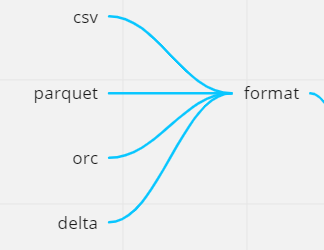

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql import functions as F
from pyspark.sql import Window

# Create SparkSession
spark = SparkSession.builder.appName("DeltaSession") \
            .config("spark.jars.packages", "io.delta:delta-core_2.12:2.2.0") \
            .config("spark.sql.extensions", "io.delta.sql.DeltaSparkSessionExtension") \
            .config("spark.sql.catalog.spark_catalog", "org.apache.spark.sql.delta.catalog.DeltaCatalog")\
            .getOrCreate()


## csv

In [ ]:
df = (spark.read.format('csv')
     .option('encoding', 'cp1252')
     .option('header', True)
     .option('sep', ';')
     .load('extract/arquivo_csv/')
     )

df.show()

## parquet

In [ ]:
df = spark.read.format('parquet').load('extract/arquivo_parquet/')
      
df.show()

In [ ]:
df = spark.read.parquet('extract/arquivo_parquet/age=30')
      
df.show()

## orc

In [ ]:
df = spark.read.format('orc').load('extract/arquivo_orc/')
      
df.show()

## delta

In [ ]:
df2 = spark.read.format('delta').load('extract/arquivo_delta/')

df2.show()

## jdbc

In [ ]:
df_db = (spark.read
        .format('jdbc')
        .option('url', 'jdbc:sqlserver://<endpoint>:1433;database=<db>')
        .option('driver', 'com.microsoft.sqlserver.jdbc.SQLServerDriver')
        .option('user', '')
        .option('password', '')
        .option('dbtable', 'dbo.<table>')
        .load()
     )